<a href="https://colab.research.google.com/github/pnir7/510-Programming-For-Digital-And-Physical-User-Interfaces/blob/milestone1/510milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## Create a Basic Chatbot


In [14]:
## Simple interactive chatbot
user = input("What is your name? ")
while True:
    msg = input("Hi how can I help you? If you want to exit, input\"END\" or \"QUIT\" ")
    if msg.lower() == "end" or msg.lower() == "quit":
        print("See you!")
        break
    else:
        num_letters = len(msg)
        num_words = len(msg.split())
        print("You entered {} letters and {} words.".format(num_letters, num_words),end="\n")

What is your name? anqi
Hi how can I help you? If you want to exit, input"END" or "QUIT" sxjnkas
You entered 7 letters and 1 words.
Hi how can I help you? If you want to exit, input"END" or "QUIT" snkxlnasx;
You entered 10 letters and 1 words.
Hi how can I help you? If you want to exit, input"END" or "QUIT" end
See you!


## Initialize a DataFrame to Store User Input

In [15]:
data_store = pd.DataFrame()

## Run the Chatbot and Save Each User's Answers (include positive answer and negative answer)

In [33]:
## Simple interactive chatbot
import random
user_responses = []
negative_responses = []
positive_responses = []
neutral_responses = []
escape = 'Q'

question = ['How are you?','How is everything going?','How do you do?','How was your day?']
positive = list(pd.read_csv("positive_words.txt").iloc[:,0].values)
negative = list(pd.read_csv("negative_words.txt").iloc[:,0].values)
positive_reply = 'Great! Cool! Happy to know that!'
negative_reply = 'Too bad! Sorry to hear about that!'
neutral_reply = 'Hmmm.. I see.'

user = input("Tell me your name! \n")

print(f'I will ask a few questions. Press "{escape}" to quit.')

while True:
    response = input(question[random.randint(0,3)]+ user +'\n' + user + ':')
    if escape in response:
        print('Bye!')
        break
    else:
        wordlist = response.split()
        positive_num = 0
        positive_response_num = 0
        negative_num = 0
        negative_response_num = 0
        neutral_response_num = 0

        for word in wordlist:
            if word in positive:
                positive_num += 1
            if word in negative:
                negative_num += 1
       
        if positive_num - negative_num > 1:
            print(positive_reply)
            response_type = 'positive'
        elif negative_num - positive_num > 1:
            print(negative_reply)
            response_type = 'negative'
        else:
            print(neutral_reply)
            response_type = 'neutral'

    new_response = {'user_name': user, 'response': response, 'response type': response_type}
    user_responses.append(new_response)
   

new_data = pd.DataFrame(user_responses)
data_store = pd.concat([data_store, new_data])
print("Thanks for your response. I've made a note of it.")


Tell me your name! 
qqq
I will ask a few questions. Press "Q" to quit.
How do you do?qqq
qqq:happy every day 
Hmmm.. I see.
How do you do?qqq
qqq:good good good
Great! Cool! Happy to know that!
How is everything going?qqq
qqq:hahaha bad sad
Too bad! Sorry to hear about that!
How is everything going?qqq
qqq:not too bad 
Hmmm.. I see.
How was your day?qqq
qqq:not too bad I am happy
Hmmm.. I see.
How is everything going?qqq
qqq:happy happy happy
Great! Cool! Happy to know that!
How was your day?qqq
qqq:Q
Bye!
Thanks for your response. I've made a note of it.


## View Cumulative Data

In [34]:
data_store

,user_name,response,response type
0,eric,good,neutral
1,eric,not bad,neutral
2,eric,good good good,positive
0,haha,good,neutral
1,haha,good good,positive
2,haha,!,neutral
0,wang,very bad I am so sad,negative
1,wang,...,neutral
2,wang,...,neutral
3,wang,you are so stupid,neutral


## Data processing

In [37]:
import pandas as pd
df = data_store


# drop the 'response' column
df.drop(['response'], axis=1, inplace=True)

# group by 'user_Name' and 'response type' and count the occurrences
df = df.groupby(['user_name', 'response type']).size().reset_index(name='Count')

# pivot the data so that each 'response_type' becomes a column, with the corresponding count
df = df.pivot(index='user_name', columns='response type', values='Count')

# fill missing values with 0
df.fillna(0, inplace=True)

# reset the index
df.reset_index(inplace=True)

# rename the columns to 'Positive_Counts', 'Negative_Counts', and 'Neutral_Counts'
df.rename(columns={'negative': 'Negative_Counts', 'neutral': 'Neutral_Counts', 'positive': 'Positive_Counts'}, inplace=True)

# show the resulting dataframe
print(df)

response type user_name  Negative_Counts  Neutral_Counts  Positive_Counts
0                  Anqi              0.0             4.0              0.0
1                Lilili              3.0             3.0              1.0
2                 Zhang              2.0             3.0              1.0
3                  eric              0.0             2.0              1.0
4                  haha              0.0             2.0              1.0
5                 hahah              1.0             2.0              2.0
6                   qqq              1.0             3.0              2.0
7                  wang              1.0             4.0              0.0
8              xiaoming              2.0             1.0              1.0


## Analyze Data

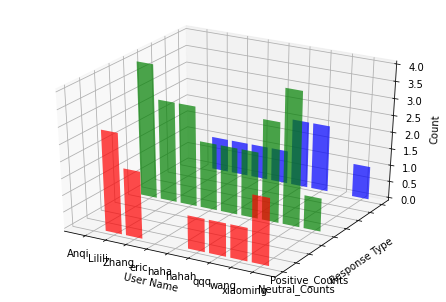

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# plot the 3D bar plot
fig = plt.figure()
ax = Axes3D(fig)
x = df['user_name']
y = df.columns[1:]
x_pos = range(len(x))

for i in range(len(y)):
    z = df.iloc[:, i+1]
    ax.bar(x_pos, z, zs=i, zdir='y', color='rgb'[i], alpha=0.7)

ax.set_xlabel('User Name')
ax.set_ylabel('Response Type')
ax.set_zlabel('Count')
ax.set_yticklabels(y)
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
plt.show()